# Part I - Exploring the Prosper Loan Dataset
## By Sondos Aabed

> My Github: [@sondosaabed](https://github.com/sondosaabed) 

> My LinkedIn: [@sondosaabed](https://www.linkedin.com/in/sondosaabed/)

<hr/>

## Abstract


<hr/>

## Table of Contents
- Introduction
    - Data Dictionary
- Objectives
- Premirely Wrangling
- Univariate extrapolation
- Bivariate extrapolation
- Multivariate extrapolation
- Conclusions

<hr/>

## Introduction

> In this notebook, the analysis is done on the Prosper Datatset which is collected from a Loan company. The dataset includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The original dataset contains 113937 rows and 81 columns out of which 12 features of intrest were selected.

### Data Dictionary
The following data dictionary shows each variable of the dataset and the corresponding description:

| Variable                                | Description                                                                                                                                                                   |
|-----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ListingKey                              | Unique key for each listing, same value as the 'key' used in the listing object in the API.                                                                                   |
| ListingNumber                           | The number that uniquely identifies the listing to the public as displayed on the website.                                                                                    |
| ListingCreationDate                     | The date the listing was created.                                                                                                                                             |
| CreditGrade                             | The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.                 |
| Term                                    | The length of the loan expressed in months.                                                                                                                                   |
| LoanStatus                              | The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. |
| ClosedDate                              | Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.                                                                                   |
| BorrowerAPR                             | The Borrower's Annual Percentage Rate (APR) for the loan.                                                                                                                     |
| BorrowerRate                            | The Borrower's interest rate for this loan.                                                                                                                                   |
| LenderYield                             | The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.                                                                  |
| EstimatedEffectiveYield                 | Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009. |
| EstimatedLoss                           | Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.                                                                |
| EstimatedReturn                         | The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009. |
| ProsperRating (numeric)                 | The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.  |
| ProsperRating (Alpha)                   | The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.                                            |
| ProsperScore                            | A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. |
| ListingCategory                         | The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7 - Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans |
| BorrowerState                           | The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.                                                                   |
| Occupation                              | The Occupation selected by the Borrower at the time they created the listing.                                                                                                 |
| EmploymentStatus                        | The employment status of the borrower at the time they posted the listing.                                                                                                    |
| EmploymentStatusDuration                | The length in months of the employment status at the time the listing was created.                                                                                            |
| IsBorrowerHomeowner                     | A Borrower will be classified as a homeowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.                        |
| CurrentlyInGroup                        | Specifies whether or not the Borrower was in a group at the time the listing was created.                                                                                     |
| GroupKey                                | The Key of the group in which the Borrower is a member of. Value will be null if the borrower does not have a group affiliation.                                              |
| DateCreditPulled                        | The date the credit profile was pulled.                                                                                                                                       |
| CreditScoreRangeLower                   | The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.                                                         |
| CreditScoreRangeUpper                   | The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.                                                         |
| FirstRecordedCreditLine                 | The date the first credit line was opened.                                                                                                                                    |
| CurrentCreditLines                      | Number of current credit lines at the time the credit profile was pulled.                                                                                                     |
| OpenCreditLines                         | Number of open credit lines at the time the credit profile was pulled.                                                                                                        |
| TotalCreditLinespast7years              | Number of credit lines in the past seven years at the time the credit profile was pulled.                                                                                     |
| OpenRevolvingAccounts                   | Number of open revolving accounts at the time the credit profile was pulled.                                                                                                  |
| OpenRevolvingMonthlyPayment             | Monthly payment on revolving accounts at the time the credit profile was pulled.                                                                                              |
| InquiriesLast6Months                    | Number of inquiries in the past six months at the time the credit profile was pulled.                                                                                         |
| TotalInquiries                          | Total number of inquiries at the time the credit profile was pulled.                                                                                                          |
| CurrentDelinquencies                    | Number of accounts delinquent at the time the credit profile was pulled.                                                                                                      |
| AmountDelinquent                        | Dollars delinquent at the time the credit profile was pulled.                                                                                                                 |
| DelinquenciesLast7Years                 | Number of delinquencies in the past 7 years at the time the credit profile was pulled.                                                                                        |
| PublicRecordsLast10Years                | Number of public records in the past 10 years at the time the credit profile was pulled.                                                                                      |
| PublicRecordsLast12Months               | Number of public records in the past 12 months at the time the credit profile was pulled.                                                                                     |
| RevolvingCreditBalance                  | Dollars of revolving credit at the time the credit profile was pulled.                                                                                                        |
| BankcardUtilization                     | The percentage of available revolving credit that is utilized at the time the credit profile was pulled.                                                                      |
| AvailableBankcardCredit                 | The total available credit via bank card at the time the credit profile was pulled.                                                                                           |
| TotalTrades                             | Number of trade lines ever opened at the time the credit profile was pulled.                                                                                                  |
| TradesNeverDelinquent                   | Number of trades that have never been delinquent at the time the credit profile was pulled.                                                                                   |
| TradesOpenedLast6Months                 | Number of trades opened in the last 6 months at the time the credit profile was pulled.                                                                                       |
| DebtToIncomeRatio                       | The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%). |
| IncomeRange                             | The income range of the borrower at the time the listing was created.                                                                                                         |
| IncomeVerifiable                        | The borrower indicated they have the required documentation to support their income.                                                                                          |
| StatedMonthlyIncome                     | The monthly income the borrower stated at the time the listing was created.                                                                                                   |
| LoanKey                                 | Unique key for each loan. This is the same key that is used in the API.                                                                                                       |
| TotalProsperLoans                       | Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.                                       |
| TotalProsperPaymentsBilled              | Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.             |
| OnTimeProsperPayments                   | Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.         |
| ProsperPaymentsLessThanOneMonthLate     | Number of payments the borrower made on Prosper loans that were less than one month late at the time they created this listing. This value will be null if the borrower had no prior loans. |
| ProsperPaymentsOneMonthPlusLate         | Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans. |
| ProsperPrincipalBorrowed                | Total principal borrowed on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.                                     |
| ProsperPrincipalOutstanding             | Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.                                        |
| ScorexChangeAtTimeOfListing             | Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans. |
| LoanCurrentDaysDelinquent               | The number of days delinquent.                                                                                                                                               |
| LoanFirstDefaultedCycleNumber           | The cycle the loan was charged off. If the loan has not charged off the value will be null.                                                                                   |
| LoanMonthsSinceOrigination              | Months since the loan originated.                                                                                                                                            |
| LoanNumber                              | The number that uniquely identifies the loan to the public as displayed on the website.                                                                                      |
| LoanOriginalAmount                      | The original amount of the loan.                                                                                                                                             |
| LoanOriginationDate                     | The date the loan originated.                                                                                                                                                |
| LoanOriginationQuarter                  | The quarter in which the loan originated.                                                                                                                                    |
| MemberKey                               | Unique key for each member. This is the same key that is used in the API.                                                                                                     |
| MonthlyLoanPayment                      | The monthly payment (principal and interest) the borrower is required to make for this loan.                                                                                 |
| LP_CustomerPayments                     | The total payments (principal + interest) that have been made on the loan by the borrower.                                                                                   |
| LP_CustomerPrincipalPayments            | The total principal payments that have been made on the loan by the borrower.                                                                                                |
| LP_InterestandFees                      | Interest and fees paid by the borrower.                                                                                                                                      |
| LP_ServiceFees                          | The servicing fees paid by the borrower.                                                                                                                                    |
| LP_CollectionFees                       | The collection fees paid by the borrower.                                                                                                                                   |
| LP_GrossPrincipalLoss                   | Gross principal loss on the loan.                                                                                                                                           |
| LP_NetPrincipalLoss                     | Net principal loss on the loan.                                                                                                                                             |
| LP_NonPrincipalRecoverypayments         | Non-principal recovery payments on the loan.                                                                                                                                |
| PercentFunded                           | The percentage of the loan that was funded.                                                                                                                                 |
| Recommendations                         | Number of recommendations the borrower had at the time they created the listing.                                                                                            |
| InvestmentFromFriendsCount              | Number of investments that were made by friends at the time the listing was created.                                                                                        |
| InvestmentFromFriendsAmount             | The dollar amount of investments that were made by friends at the time the listing was created.                                                                              |
| Investors                               | The number of investors that funded the loan.                                                                                                                               |


<hr/>

## Objectives

**1.  Loan Performance Analysis**

**2.  Credit Score and Borrower Analysis**

**3.  Geographic and Demographic Analysis**

<hr/>

## Preliminary Wrangling

- In this section, a preliminary data wrangling is done on the dataset. 

In [1]:
## import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the dataset

> Let's Load in the dataset into a pandas dataframe:

In [2]:
df = pd.read_csv("./data/prosperLoanData.csv") ## Load the csv into pandas dataframe
df.sample(10) ## Looking at a random sample of 10 rows.

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9411,7B6435369492901287F1C12,550907,2012-01-12 06:32:56.637000000,NaN,60,Completed,2014-01-24 00:00:00,0.14766,0.1296,0.1196,...,-259.27,0.00,0.00,0.00,0.0,1.0,0,0,0.0,204
7487,2D383603494242171742DE6,1212527,2014-02-27 13:13:26.180000000,NaN,36,Current,NaN,0.31196,0.2724,0.2624,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,30
29595,BE963501181925634AE8B5D,487308,2010-12-09 23:35:33.197000000,NaN,36,Chargedoff,2013-02-02 00:00:00,0.35858,0.3220,0.3120,...,-64.85,0.00,2696.51,2696.51,0.0,1.0,0,0,0.0,77
19330,13453599562822763F1C1FE,1144487,2014-01-17 16:29:47.080000000,NaN,60,Current,NaN,0.18068,0.1570,0.1470,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
8812,52A035522047895791CEC82,616051,2012-07-24 08:54:43.947000000,NaN,60,Current,NaN,0.30697,0.2804,0.2704,...,-219.37,0.00,0.00,0.00,0.0,1.0,0,0,0.0,19
33445,C74935524824367158DBA7E,611570,2012-07-13 12:24:26.937000000,NaN,60,Chargedoff,2013-03-21 00:00:00,0.35838,0.3304,0.3204,...,-10.03,0.00,3920.12,3920.12,0.0,1.0,0,0,0.0,24
6330,9D9B3547652480752D8FDE0,595303,2012-06-01 18:16:11.130000000,NaN,60,Current,NaN,0.31375,0.2870,0.2770,...,-56.50,0.00,0.00,0.00,0.0,1.0,0,0,0.0,75
74656,F2503525834862668B39E57,528906,2011-09-22 17:29:03.063000000,NaN,36,Current,NaN,0.20200,0.1799,0.1699,...,-208.06,0.00,0.00,0.00,0.0,1.0,0,0,0.0,34
67049,7DE43403654069581F37395,225396,2007-11-03 11:15:19.570000000,C,36,Chargedoff,2011-01-13 00:00:00,0.18726,0.1800,0.1700,...,-63.03,0.00,400.74,400.75,0.0,1.0,0,0,0.0,41
71842,7EA83479372126569B22C3B,450995,2010-03-18 13:01:12.087000000,NaN,36,Chargedoff,2011-09-02 00:00:00,0.34052,0.3165,0.3065,...,-12.73,-190.29,1720.41,1720.41,650.0,1.0,0,2,150.0,63


### Dataset Structure

In [3]:
df.shape ## showing the shape of the dataset

(113937, 81)

> This dataset has 113,937 rows and 81 columns. Which is a relatively big dataset.

### Dataset Assessment and Cleaning

#### Duplicated Records

In [4]:
df.duplicated(subset='LoanKey').sum()

871

> Let's identify the duplicated records based on the LoanKey and see if wwe should handle this

In [5]:
duplicates = df[df.duplicated(subset='LoanKey', keep=False)]
display(duplicates.head(10))

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
29,0F563597161095613517437,1051243,2013-12-17 09:18:33.220000000,NaN,36,Current,NaN,0.15223,0.1239,0.1139,...,-29.73,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
176,106335993636414276CB477,1119836,2014-01-08 14:27:50.320000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,...,-3.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,5
313,09233589620788733CFB8CE,930842,2013-09-25 08:03:11.860000000,NaN,36,Current,NaN,0.19144,0.1550,0.1450,...,-36.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,169
349,313635901230654318A9030,931467,2013-09-26 18:50:29.053000000,NaN,36,Current,NaN,0.17090,0.1349,0.1249,...,-15.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
442,09AD35918712001025AC1BD,969821,2013-10-24 13:21:31.607000000,NaN,36,Current,NaN,0.20524,0.1685,0.1585,...,-8.41,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
444,09CD3592594126374FB0A7C,986199,2013-10-18 08:28:03.610000000,NaN,36,Current,NaN,0.22773,0.1905,0.1805,...,-42.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
455,31C73597152310464749E00,1092437,2013-12-23 13:47:35.500000000,NaN,36,Current,NaN,0.17151,0.1355,0.1255,...,-6.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
461,44F2358557406858060EBDE,870200,2013-08-15 07:12:49.410000000,NaN,60,Current,NaN,0.18965,0.1660,0.1560,...,-49.69,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
df.drop_duplicates(subset='LoanKey', keep='first', inplace=True) ## Dropping the duplicated records and keeping only the first record

In [7]:
print(df.duplicated(subset='LoanKey').sum()) ## Checking the drop of duplicted 
df.shape

0


(113066, 81)

> Let's check for the duplicated records based on the `ListingKey` based on teh documentation it has to be unique too.

In [8]:
df.duplicated(subset='ListingKey').sum() ## checking for duliated based on the listing key 

0

#### Data types Validity

- Assessment: Let's look at the data types of these variables and assess them using `.info`:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113066 non-null  object 
 1   ListingNumber                        113066 non-null  int64  
 2   ListingCreationDate                  113066 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113066 non-null  int64  
 5   LoanStatus                           113066 non-null  object 
 6   ClosedDate                           55076 non-null   object 
 7   BorrowerAPR                          113041 non-null  float64
 8   BorrowerRate                         113066 non-null  float64
 9   LenderYield                          113066 non-null  float64
 10  EstimatedEffectiveYield              83982 non-null   float64
 11  EstimatedLoss     

> We have the columns of `ClosedDate`, `LoanOriginationDate`, `DateCreditPulled`, and the `ListingCreationDate` has an object type and it has to be a datetime type.

In [10]:
## listing the date columns
date_columns = ['ClosedDate', 'LoanOriginationDate', 'DateCreditPulled', 'ListingCreationDate'] 

### Loopong through the list and coverting to datetime data type
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='mixed') ## using the format as mixed to infer the format for each element individually

df.info() ### check if that is successful

<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113066 non-null  object        
 1   ListingNumber                        113066 non-null  int64         
 2   ListingCreationDate                  113066 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113066 non-null  int64         
 5   LoanStatus                           113066 non-null  object        
 6   ClosedDate                           55076 non-null   datetime64[ns]
 7   BorrowerAPR                          113041 non-null  float64       
 8   BorrowerRate                         113066 non-null  float64       
 9   LenderYield                          113066 non-null  float64       
 10  E

> Now the rest of the data types of the variables are valid.

#### Data Completness

In [11]:
def get_percent_null(df):
    """
    Args:
        - df (pd.Dataframe)
    Returns:
        - The percentages of missing values
    """
    null_counts = df.isnull().sum()
    null_counts = null_counts[null_counts > 0].sort_values()
    return (null_counts/df.shape[0])*100

In [12]:
get_percent_null(df) 

BorrowerAPR                             0.022111
CreditScoreRangeUpper                   0.522704
CreditScoreRangeLower                   0.522704
PublicRecordsLast10Years                0.616454
CurrentDelinquencies                    0.616454
InquiriesLast6Months                    0.616454
TotalCreditLinespast7years              0.616454
FirstRecordedCreditLine                 0.616454
DelinquenciesLast7Years                 0.875595
TotalInquiries                          1.025065
EmploymentStatus                        1.994410
Occupation                              3.121186
BorrowerState                           4.877682
AvailableBankcardCredit                 6.672209
TradesOpenedLast6Months                 6.672209
TradesNeverDelinquent (percentage)      6.672209
TotalTrades                             6.672209
CurrentCreditLines                      6.725276
OpenCreditLines                         6.725276
PublicRecordsLast12Months               6.725276
RevolvingCreditBalan

> There are many columns that has null values, some of which have a very high count of null values. The following columns were the highest percentage of null such as higher than 50%. These columns are droppped.

In [13]:
high_missing_percent = ['CreditGrade', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber', 'ClosedDate', 'TotalProsperLoans',
 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding'] ## list of columns with missing values higher than 50% 

In [14]:
df.drop(columns= high_missing_percent, inplace=True) ## Drop the list of high percentage columns

In [15]:
df.shape ## Check if the dropping was successful

(113066, 70)

> The drop is checked now that the variables went from 81 to 70.

Handling the other null values by dropping NA values and rows:

In [16]:
get_percent_null(df)

BorrowerAPR                            0.022111
CreditScoreRangeUpper                  0.522704
CreditScoreRangeLower                  0.522704
TotalCreditLinespast7years             0.616454
CurrentDelinquencies                   0.616454
FirstRecordedCreditLine                0.616454
PublicRecordsLast10Years               0.616454
InquiriesLast6Months                   0.616454
DelinquenciesLast7Years                0.875595
TotalInquiries                         1.025065
EmploymentStatus                       1.994410
Occupation                             3.121186
BorrowerState                          4.877682
AvailableBankcardCredit                6.672209
TradesOpenedLast6Months                6.672209
TotalTrades                            6.672209
TradesNeverDelinquent (percentage)     6.672209
PublicRecordsLast12Months              6.725276
RevolvingCreditBalance                 6.725276
BankcardUtilization                    6.725276
CurrentCreditLines                     6

> These columns are identifiers, mostly unique between each loan.They are irrelevant for the task and therefore they should be dropped too.

In [17]:
df.columns 

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term',
       'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTra

In [18]:
## List of identifiers and other irrelevant columns
identifiers = ["ListingKey", "ListingNumber", "GroupKey", "LoanKey", "LoanNumber", "MemberKey", "DateCreditPulled"]
df.drop(columns= identifiers, axis= 1, inplace= True ) ## Dropping irrelevant columns

In [19]:
df.shape ## 

(113066, 63)

> The drop is done, since the features count went down to 63.

In [20]:
get_percent_null(df)

BorrowerAPR                            0.022111
CreditScoreRangeUpper                  0.522704
CreditScoreRangeLower                  0.522704
InquiriesLast6Months                   0.616454
TotalCreditLinespast7years             0.616454
FirstRecordedCreditLine                0.616454
PublicRecordsLast10Years               0.616454
CurrentDelinquencies                   0.616454
DelinquenciesLast7Years                0.875595
TotalInquiries                         1.025065
EmploymentStatus                       1.994410
Occupation                             3.121186
BorrowerState                          4.877682
AvailableBankcardCredit                6.672209
TradesOpenedLast6Months                6.672209
TotalTrades                            6.672209
TradesNeverDelinquent (percentage)     6.672209
PublicRecordsLast12Months              6.725276
RevolvingCreditBalance                 6.725276
BankcardUtilization                    6.725276
OpenCreditLines                        6

> Let's handle the lower percentages by only dropping the NA values instead of the whole columns.

In [21]:
df.dropna(inplace=True)

In [22]:
get_percent_null(df)

Series([], dtype: float64)

> No missing NA values left.

In [23]:
df.shape

(75486, 63)

> After handling missing values and dropping unneccary columns the shape of the data is 76,216 rows and 63 columns

### Main Features of interest
- All the left columns are the features of intrest they will be devided based on the objective into three subsets.

- Objective 1: Loan Performance

In [24]:
loan_performance_columns = [ 'LoanStatus', 'LoanCurrentDaysDelinquent','LoanMonthsSinceOrigination',
    'LoanOriginalAmount', 'BorrowerAPR', 'DebtToIncomeRatio', 'CreditScoreRangeLower','CreditScoreRangeUpper',
    'ProsperScore', 'EmploymentStatus','IsBorrowerHomeowner']

loan_performance_df = df[loan_performance_columns]
print(loan_performance_df.shape)
loan_performance_df.head()

(75486, 11)


,LoanStatus,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,BorrowerAPR,DebtToIncomeRatio,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperScore,EmploymentStatus,IsBorrowerHomeowner
1,Current,0,0,10000,0.12016,0.18,680.0,699.0,7.0,Employed,False
3,Current,0,16,10000,0.12528,0.15,800.0,819.0,9.0,Employed,True
4,Current,0,6,15000,0.24614,0.26,680.0,699.0,4.0,Employed,True
5,Current,0,3,15000,0.15425,0.36,740.0,759.0,10.0,Employed,True
6,Current,0,11,3000,0.31032,0.27,680.0,699.0,2.0,Employed,False


- Objective 2: Credit Score and Borrower Analysis

In [25]:
credit_borrower_columns = [ 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'ProsperRating (numeric)',
    'ProsperRating (Alpha)','ProsperScore','IncomeRange','EmploymentStatus','IsBorrowerHomeowner',
    'BorrowerAPR', 'LoanOriginalAmount']

credit_borrower_df = df[credit_borrower_columns]
print(credit_borrower_df.shape)
credit_borrower_df.head()

(75486, 10)


,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,IncomeRange,EmploymentStatus,IsBorrowerHomeowner,BorrowerAPR,LoanOriginalAmount
1,680.0,699.0,6.0,A,7.0,"$50,000-74,999",Employed,False,0.12016,10000
3,800.0,819.0,6.0,A,9.0,"$25,000-49,999",Employed,True,0.12528,10000
4,680.0,699.0,3.0,D,4.0,"$100,000+",Employed,True,0.24614,15000
5,740.0,759.0,5.0,B,10.0,"$100,000+",Employed,True,0.15425,15000
6,680.0,699.0,2.0,E,2.0,"$25,000-49,999",Employed,False,0.31032,3000


- Objective 3: Geographic and Demographic Analysis

In [26]:
geo_demo_columns = [ 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange',
    'IsBorrowerHomeowner', 'LoanOriginalAmount', 'ProsperRating (Alpha)', 'CreditScoreRangeLower',
    'CreditScoreRangeUpper']

geo_demo_df = df[geo_demo_columns]
print(geo_demo_df.shape)
geo_demo_df.head()

(75486, 9)


,BorrowerState,Occupation,EmploymentStatus,IncomeRange,IsBorrowerHomeowner,LoanOriginalAmount,ProsperRating (Alpha),CreditScoreRangeLower,CreditScoreRangeUpper
1,CO,Professional,Employed,"$50,000-74,999",False,10000,A,680.0,699.0
3,GA,Skilled Labor,Employed,"$25,000-49,999",True,10000,A,800.0,819.0
4,MN,Executive,Employed,"$100,000+",True,15000,D,680.0,699.0
5,NM,Professional,Employed,"$100,000+",True,15000,B,740.0,759.0
6,KS,Sales - Retail,Employed,"$25,000-49,999",False,3000,E,680.0,699.0


## Univariate Exploration

> In this section, we are investigating distributions of individual variables. To see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables. the "Question-Visualization-Observations" framework is used throughout the exploration, it involves asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.

**1. Loan Status**

> For this visualization, we want to create a simplified version of this columns, since there are multiple values for the Due Past values.

In [27]:
loan_performance_df['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [28]:
loan_performance_df['SimplifiedLoanStatus'] = loan_performance_df['LoanStatus'].apply(lambda x: 'Past Due' if 'Past Due' in x else x)
loan_performance_df.head(10)

C:\Users\SS\AppData\Local\Temp\ipykernel_29904\3862042336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_performance_df['SimplifiedLoanStatus'] = loan_performance_df['LoanStatus'].apply(lambda x: 'Past Due' if 'Past Due' in x else x)


,LoanStatus,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,BorrowerAPR,DebtToIncomeRatio,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,SimplifiedLoanStatus
1,Current,0,0,10000,0.12016,0.18,680.0,699.0,7.0,Employed,False,Current
3,Current,0,16,10000,0.12528,0.15,800.0,819.0,9.0,Employed,True,Current
4,Current,0,6,15000,0.24614,0.26,680.0,699.0,4.0,Employed,True,Current
5,Current,0,3,15000,0.15425,0.36,740.0,759.0,10.0,Employed,True,Current
6,Current,0,11,3000,0.31032,0.27,680.0,699.0,2.0,Employed,False,Current
7,Current,0,10,10000,0.23939,0.24,700.0,719.0,4.0,Employed,False,Current
8,Current,0,3,10000,0.07620,0.25,820.0,839.0,9.0,Employed,True,Current
10,Current,0,22,13500,0.27462,0.12,640.0,659.0,7.0,Employed,False,Current
12,Past Due (1-15 days),3,2,4000,0.17969,0.18,680.0,699.0,4.0,Employed,False,Past Due
13,Current,0,8,8500,0.13138,0.09,740.0,759.0,8.0,Employed,True,Current


**Question**: What are the distribution of the Loan Statuses?

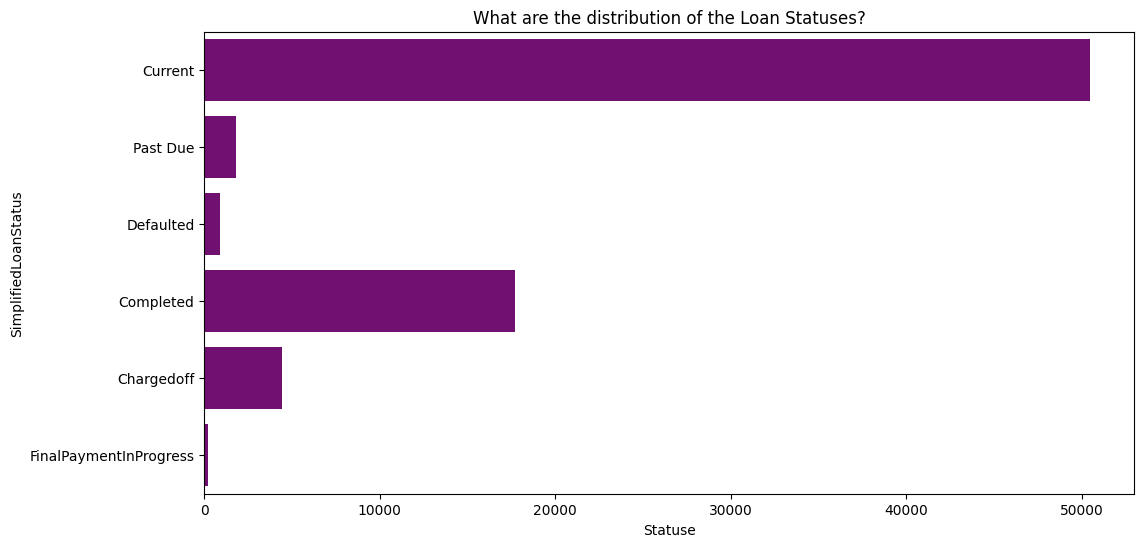

In [112]:
plt.figure(figsize=(12, 6))
sns.countplot(data = loan_performance_df, y = 'SimplifiedLoanStatus', color = 'purple')
plt.xlabel('Statuse')
plt.title('What are the distribution of the Loan Statuses?');

> It seems that the majority status among the loan statuses is the `current` which is 50462, While the completed are success story they are  `17675`. The chargedoff however are 4444 cases they are failed loans. While the `deafulted` are the cases in danger of `chargedoff` they reach 885. And the past due are slightly larger 1835 but still not in danger of charge off. 

> The chraged off and the deafulted represntts the actual risks for these loans.

> Nothing unusual with this distribution.

**2. The Loan Original Amount**

Let's take a look into the Loan Original Amounts.

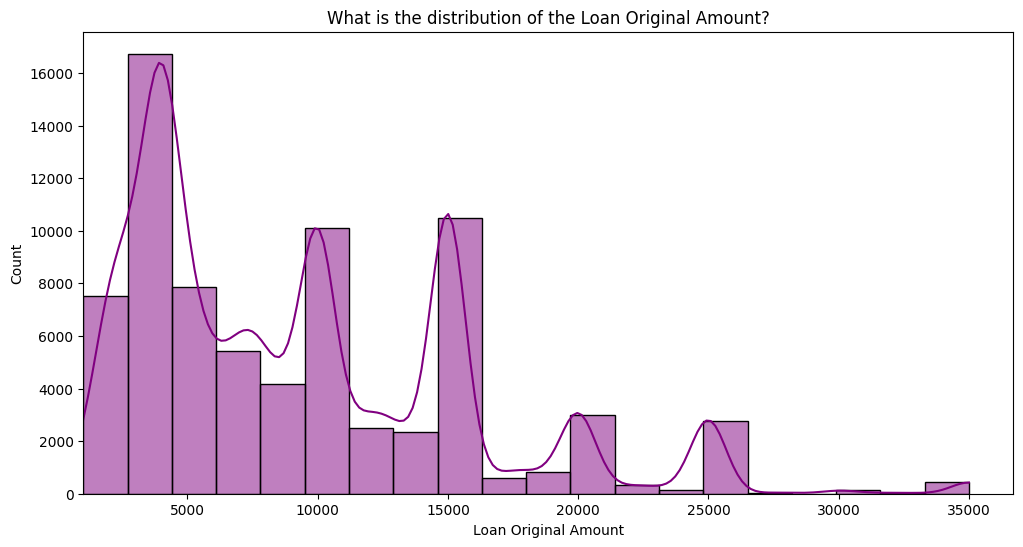

In [113]:
plt.figure(figsize=(12, 6))
sns.histplot(data= credit_borrower_df,  x = 'LoanOriginalAmount', bins=20, kde= True, color = 'purple')
plt.title('What is the distribution of the Loan Original Amount?')
plt.ylabel('Count')
plt.xlim(1000)
plt.xlabel('Loan Original Amount');

> The distribution of the Loan Original Amount is right skewed, with multiple peaks suggesting distinct borrower groups. Most loans are relatively small, but there are outliers indicating larger, less frequent loan amounts. However these are numerical outliers but valid values for a given loan amount, so doesn't need to be handled.

**3. Borrower State**

Which states are the borrowers from?

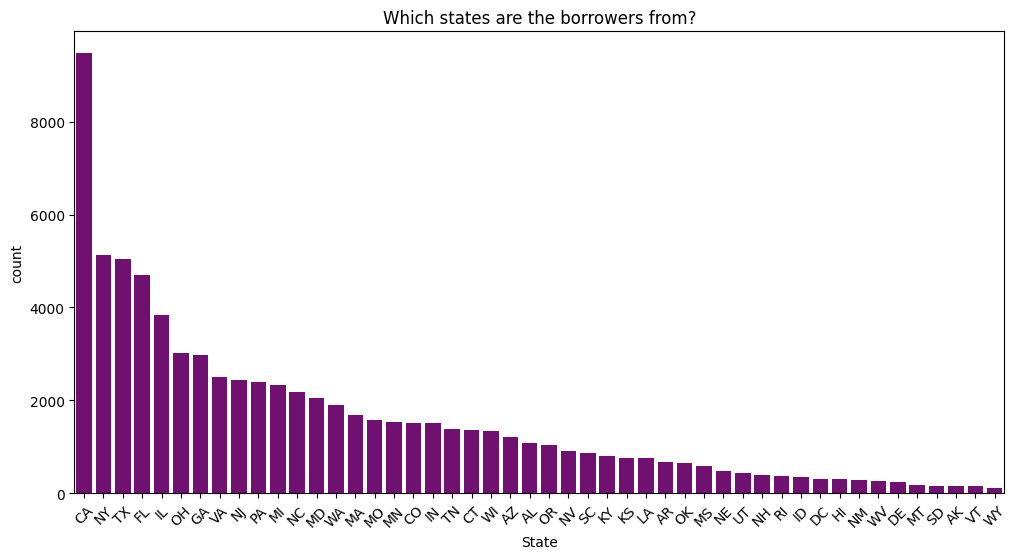

In [111]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(geo_demo_df['BorrowerState'].value_counts(), color = 'purple')
plt.title('Which states are the borrowers from?')
plt.xlabel('State')
plt.xticks(rotation = 45);

> California boasts the highest number of borrowers among all US states, followed closely by Texas, New York, and Florida. On the other end of the spectrum, states like South Dakota, Alaska, Vermont, and Wyoming have significantly lower borrower counts.

> California is an unpper bound outlier, however this is numerically and valid values that will not be handled.

## Bivariate Exploration

> In this section, relationships between pairs of variables in the data are investigated. The variables of intreset that have been introduced in the previous sections.

**Does having investors affect the monthly loan payments?**

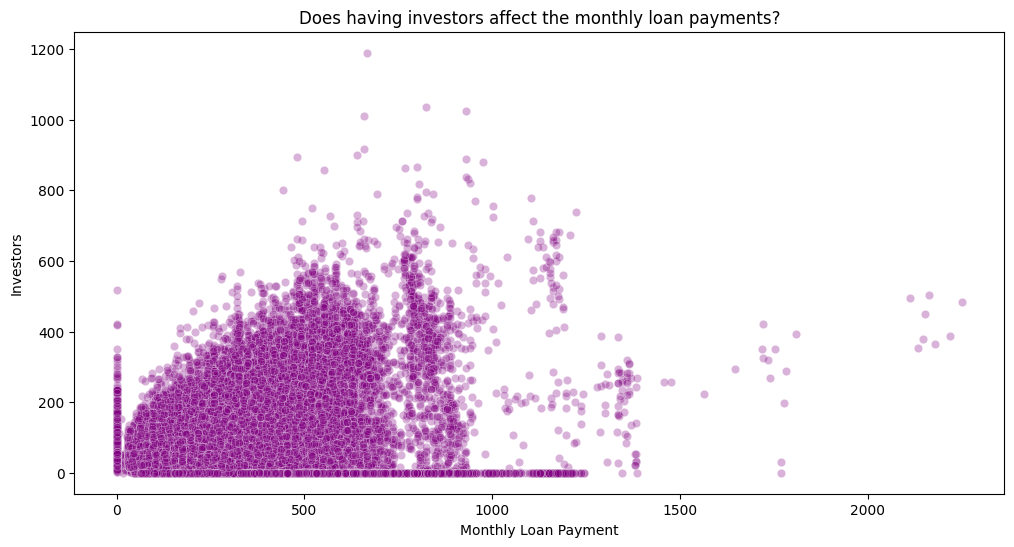

In [114]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data= df, x='MonthlyLoanPayment', y='Investors', alpha=0.3, color = 'purple')
plt.title('Does having investors affect the monthly loan payments?')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Investors');

> It seems that the original loan amount 

**Does Loan status have unusual loan original amount?**

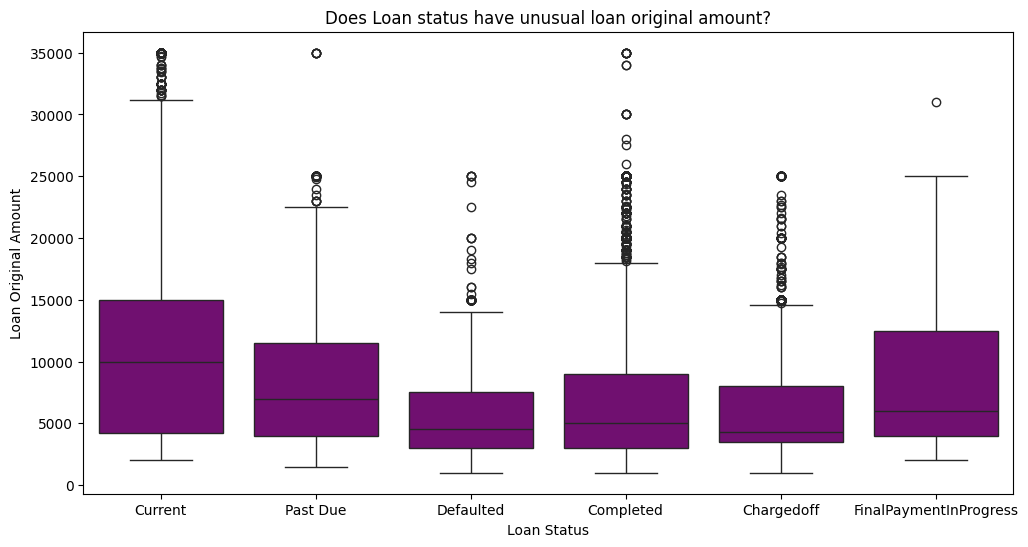

In [110]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_performance_df, x='SimplifiedLoanStatus', y='LoanOriginalAmount', color='purple')
plt.title('Does Loan status have unusual loan original amount?')
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount');

> It seems that the original loan amount 

**How does the Original Amount of Loan change over time?**

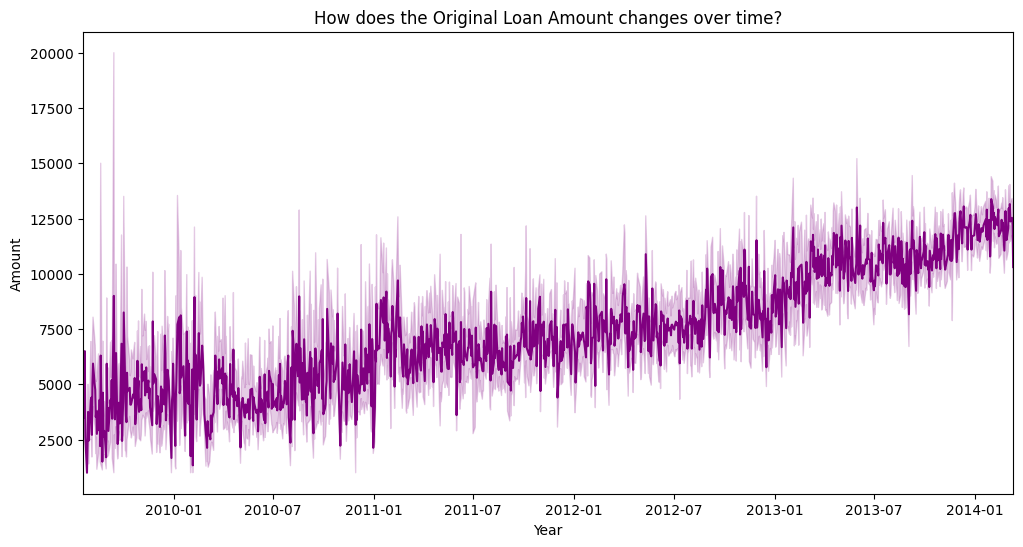

In [115]:
plt.figure(figsize=(12, 6))
sns.lineplot(data= df, x = 'LoanOriginationDate', y ='LoanOriginalAmount', color = 'purple')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.xlim(pd.to_datetime('2009-07-20'), pd.to_datetime('2014-03-12'))
plt.title('How does the Original Loan Amount changes over time?');

> It seems that the original loan amount 

**Does employment status have unuaual credit score lower range?**

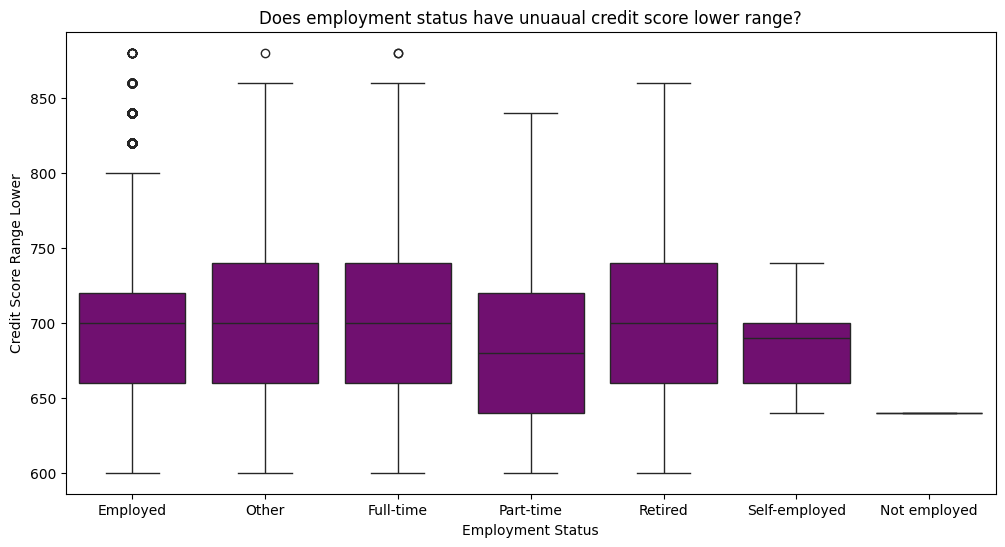

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=credit_borrower_df, x='EmploymentStatus', y='CreditScoreRangeLower', color='purple')
plt.title('Does employment status have unuaual Credit Score Range Lower?')
plt.xlabel('Employment Status')
plt.ylabel('Credit Score Range Lower');

> It seems that the original loan amount 

**What are the employment statuses of students who are taking loans?**

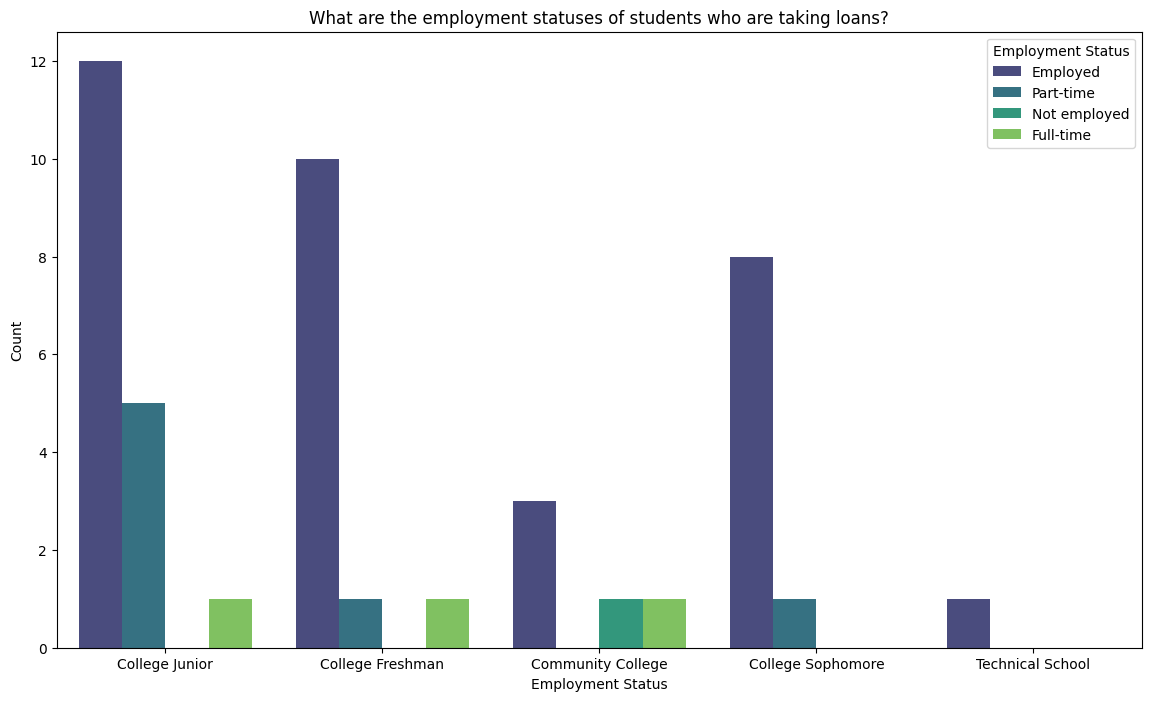

In [120]:
study_occupations = ['Student - College Freshman', 'Student - College Junior', 'Student - Community College', 
                     'Student - College Sophomore', 'Student - Technical School']

labels = ['College Freshman', 'College Junior','Community College', 'College Sophomore', 'Technical School']

plt.figure(figsize=(14, 8))
sns.countplot(data=geo_demo_df[geo_demo_df['Occupation'].isin(study_occupations)], x='Occupation', hue='EmploymentStatus', palette='viridis')
plt.title('What are the employment statuses of students who are taking loans?')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(ticks= study_occupations, labels= labels)
plt.legend(title='Employment Status');

> It seems that the original loan amount 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> **Rubric Tip**: Create a list of summary findings to make it easy to review.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

